In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import os

## lectura de datos

In [32]:
#data = pd.read_csv('df_o2_2.csv',sep=';')
data = pd.read_csv('C:/Users/kvalenci/Desktop/Nueva carpeta/Python/computer_vision/entregable_enero2023/documentos/completos/final/arbol_2.csv')

In [171]:
data.head()

,Fechas,Flujo Aire,Enriquecimiento O2,Alimentacion Concentrado,Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B.,Temperatura Esc.,TimeStamp_2,Ley Concentrado S,Ley Concentrado Cu,Ley Cu M.B.,Ley Fe304 Esc.,Coef_o2,Temperatura Pirometro
0,2021-07-01 00:05:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,2021-07-01,0.0,0.0,74.309998,38.099998,50.0,0.0
1,2021-07-01 00:10:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,2021-07-01,0.0,0.0,74.309998,38.099998,50.0,0.0
2,2021-07-01 00:15:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,2021-07-01,0.0,0.0,74.309998,38.099998,50.0,0.0
3,2021-07-01 00:20:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,2021-07-01,0.0,0.0,74.309998,38.099998,50.0,0.0
4,2021-07-01 00:25:00,0.0,21.0,0.0,0.0,0.0,0.000092,0.000092,2021-07-01,0.0,0.0,74.309998,38.099998,50.0,0.0


In [34]:
data.fillna(0, inplace=True)

In [35]:
data.rename(columns={'Fecha':'Fechas'}, inplace=True)

In [37]:
#data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Fechas']=pd.to_datetime(data['Fechas'],format='%Y-%m-%d %H:%M')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221896 entries, 0 to 221895
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Fechas                    221896 non-null  datetime64[ns]
 1   Flujo Aire                221896 non-null  float64       
 2   Enriquecimiento O2        221896 non-null  float64       
 3   Alimentacion Concentrado  221896 non-null  float64       
 4   Alimentacion Si02         221896 non-null  float64       
 5   Alimentacion Carga Fria   221896 non-null  float64       
 6   Temperatura M.B.          221896 non-null  float64       
 7   Temperatura Esc.          221896 non-null  float64       
 8   TimeStamp_2               221896 non-null  object        
 9   Ley Concentrado S         221896 non-null  float64       
 10  Ley Concentrado Cu        221896 non-null  float64       
 11  Ley Cu M.B.               221896 non-null  float64       
 12  Le

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8f3031e90>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8f320f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8f2ff5150>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8f3218f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8f3219a50>],
 'means': []}

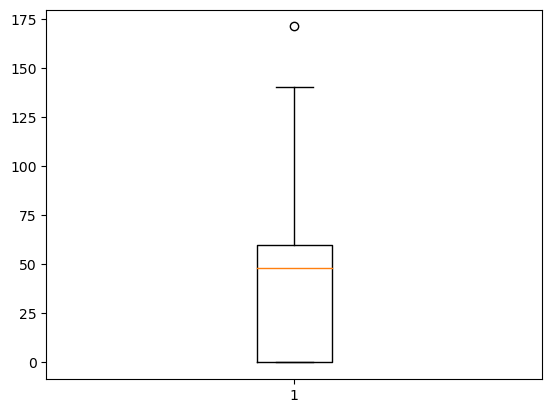

In [16]:
#eliminar outliers de la tasa de alimentación que ese sera nuestro indicador
fig, ax = plt.subplots()
ax.boxplot(data['Alimentacion Concentrado'].dropna().astype(float))

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8f320ddd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8f32df790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8f32bfc50>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8f32e8dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8f32e9890>],
 'means': []}

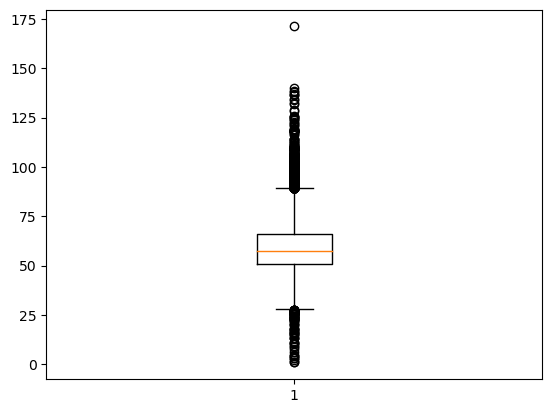

In [17]:
fig, ax = plt.subplots()
ax.boxplot(data[data['Alimentacion Concentrado']>0]['Alimentacion Concentrado'].dropna().astype(float))

In [18]:
quartiles = ax.boxplot(data[data['Alimentacion Concentrado']>0]['Alimentacion Concentrado'].dropna().astype(float))['whiskers']

In [19]:
q1 = quartiles[0].get_ydata()[0]
q3 = quartiles[1].get_ydata()[0]

print("Primer Cuartil (Q1):", q1)
print("Tercer Cuartil (Q3):", q3)

Primer Cuartil (Q1): 50.768401655
Tercer Cuartil (Q3): 66.14771935


In [20]:
Q1 = data['Alimentacion Concentrado'].quantile(0.25)
Q3 = data['Alimentacion Concentrado'].quantile(0.75)
IQR = q3 - q1
limite_inferior = q1 - 1.5 * IQR
limite_superior = q3 + 1.5 * IQR
print(limite_inferior,limite_superior)
df_sin_outliers = data[(data['Alimentacion Concentrado'] >= limite_inferior) & (data['Alimentacion Concentrado'] <= limite_superior)]

27.69942511249999 89.21669589250001


In [15]:
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129818 entries, 7377 to 221895
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Fechas                    129818 non-null  datetime64[ns]
 1   Flujo Aire                129818 non-null  float64       
 2   Enriquecimiento O2        129818 non-null  float64       
 3   Alimentacion Concentrado  129818 non-null  float64       
 4   Alimentacion Si02         129818 non-null  float64       
 5   Alimentacion Carga Fria   129818 non-null  float64       
 6   Temperatura M.B.          129818 non-null  float64       
 7   Temperatura Esc.          129818 non-null  float64       
 8   TimeStamp_2               129818 non-null  object        
 9   Ley Concentrado S         129818 non-null  float64       
 10  Ley Concentrado Cu        129818 non-null  float64       
 11  Ley Cu M.B.               129818 non-null  float64       
 12 

{'whiskers': [<matplotlib.lines.Line2D at 0x2611fd2bb90>,
 'caps': [<matplotlib.lines.Line2D at 0x2611fd39390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2611fd07050>],
 'medians': [<matplotlib.lines.Line2D at 0x2611fd3a8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2611fd2b950>],
 'means': []}

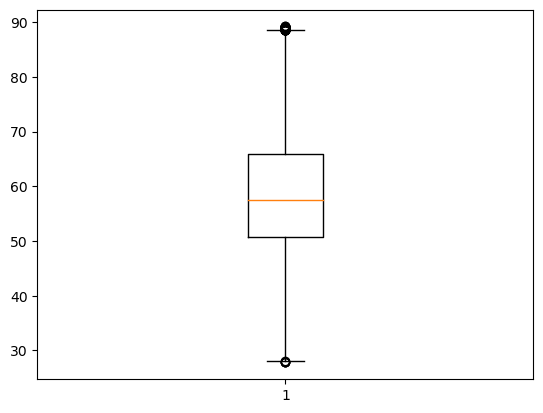

In [16]:
fig, ax = plt.subplots()
ax.boxplot(df_sin_outliers[df_sin_outliers['Alimentacion Concentrado']>0]['Alimentacion Concentrado'].dropna().astype(float))

In [17]:
df_sin_outliers.columns

Index(['Fechas', 'Flujo Aire', 'Enriquecimiento O2',
       'Alimentacion Concentrado', 'Alimentacion Si02',
       'Alimentacion Carga Fria', 'Temperatura M.B.', 'Temperatura Esc.',
       'TimeStamp_2', 'Ley Concentrado S', 'Ley Concentrado Cu', 'Ley Cu M.B.',
       'Ley Fe304 Esc.', 'Coef_o2', 'Temperatura Pirometro'],
      dtype='object')

### datos termales

In [57]:
temperatura2 = pd.read_csv('data_hikvi_20230908203617.csv')

In [58]:
temperatura2

,Fechas,mean0,max0,min0,c_x0,c_y0,mean1,max1,min1,c_x1,...,mean270,max270,min270,c_x270,c_y270,mean271,max271,min271,c_x271,c_y271
0,2023-07-22 04:50:22,32.632902,33.303922,30.792157,25.0,25.0,29.342914,33.303922,26.605882,25.0,...,21.266471,32.945098,16.2,625.0,925.0,25.572253,33.543137,16.2,625.0,975.0
1,2023-07-22 04:50:42,32.173427,33.031373,30.593725,25.0,25.0,28.991108,32.799216,26.298824,25.0,...,21.106912,32.567059,16.2,625.0,925.0,25.288056,32.683137,16.2,625.0,975.0
2,2023-07-22 04:51:02,32.341375,33.201961,30.622353,25.0,25.0,29.065612,32.967451,26.401176,25.0,...,21.174323,32.498431,16.2,625.0,925.0,25.420504,33.201961,16.2,625.0,975.0
3,2023-07-22 04:51:22,32.862422,33.715686,31.000784,25.0,25.0,29.585444,33.479608,26.633333,25.0,...,21.602975,33.243529,16.6,625.0,925.0,25.850715,33.715686,16.6,625.0,975.0
4,2023-07-22 04:51:42,32.847132,33.833725,31.000784,25.0,25.0,29.626299,33.597647,26.633333,25.0,...,21.592749,33.125490,16.6,625.0,925.0,25.858581,33.125490,16.6,625.0,975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250067,2023-09-08 20:34:57,154.412253,158.440000,149.260000,25.0,25.0,151.500941,156.400000,141.100000,25.0,...,103.382516,229.840000,79.9,625.0,925.0,137.488580,227.800000,79.9,625.0,975.0
250068,2023-09-08 20:35:17,152.995800,158.300392,146.050980,25.0,25.0,150.301201,153.196471,140.947059,25.0,...,103.084081,227.713725,79.7,625.0,925.0,137.246131,227.713725,79.7,625.0,975.0
250069,2023-09-08 20:35:37,155.776883,161.562745,149.313333,25.0,25.0,152.377387,156.458824,141.147059,25.0,...,103.303213,226.892941,79.9,625.0,925.0,137.452083,227.913725,79.9,625.0,975.0
250070,2023-09-08 20:35:57,155.109536,161.088235,148.820000,25.0,25.0,151.663938,155.976471,140.641176,25.0,...,102.776647,226.518824,79.3,625.0,925.0,136.936691,227.541176,79.3,625.0,975.0


In [8]:
#temperatura2 = temperatura2.iloc[0:10, :]

In [9]:
#fila_deseada = temperatura2.iloc[0]

In [10]:
#fila_deseada

Fechas     2023-07-22 04:50:22
mean0                32.632902
max0                 33.303922
min0                 30.792157
c_x0                      25.0
                  ...         
mean271              25.572253
max271               33.543137
min271                    16.2
c_x271                   625.0
c_y271                   975.0
Name: 0, Length: 1361, dtype: object

In [73]:
#vec=temperatura2.columns.to_numpy()

In [59]:
lista=temperatura2.columns
text=[]
for l in lista:
    if 'mean' in l:
        text.append(l)

In [60]:
vec=fila_deseada[text].to_numpy()
type(vec)

numpy.ndarray

In [61]:
len(vec)

272

{'whiskers': [<matplotlib.lines.Line2D at 0x2a6a2eba990>,
 'caps': [<matplotlib.lines.Line2D at 0x2a70312bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6a2ebb210>],
 'medians': [<matplotlib.lines.Line2D at 0x2a703128e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6d6e31b10>],
 'means': []}

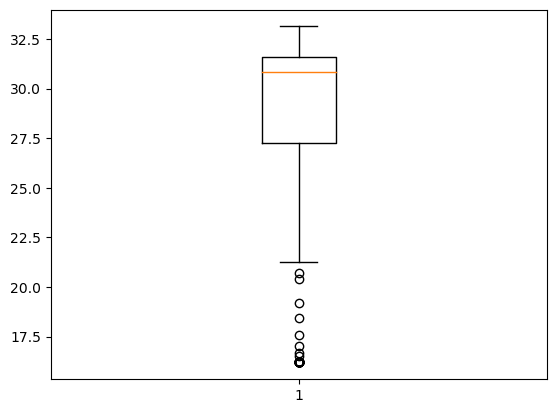

In [62]:
fig, ax = plt.subplots()
ax.boxplot(vec)

In [63]:
quartiles = ax.boxplot(vec)['whiskers']
q1 = quartiles[0].get_ydata()[0]
q3 = quartiles[1].get_ydata()[0]

print("Primer Cuartil (Q1):", q1)
print("Tercer Cuartil (Q3):", q3)
IQR = q3 - q1
limite_inferior = q1 - 1.5 * IQR
limite_superior = q3 + 1.5 * IQR
print(limite_inferior,limite_superior)

Primer Cuartil (Q1): 27.26388739169137
Tercer Cuartil (Q3): 31.61225020620493
20.74134316992103 38.13479442797527


In [70]:
#generar una funcion que me va a devolver el limite superior e inferior de cada uno de los valores de la imagen termal
def calcular_lim_min_max(*datos):
    quartiles = ax.boxplot(datos)['whiskers']
    q1 = quartiles[0].get_ydata()[0]
    q3 = quartiles[1].get_ydata()[0]

    #print("Primer Cuartil (Q1):", q1)
    #print("Tercer Cuartil (Q3):", q3)
    IQR = q3 - q1
    limite_inferior = q1 - 1.5 * IQR
    limite_superior = q3 + 1.5 * IQR
    punto_medio=sum(list(datos))/len(list(datos))
    return limite_inferior, limite_superior,punto_medio

In [71]:
#Obtener todas las columas con mean y 
dat_temp=temperatura2.copy()
lista=temperatura2.columns
text=[]
for l in lista:
    if 'mean' in l:
        text.append(l)

dat_temp[['lim_inf','lim_sup','prom_mean']]=dat_temp[text].apply(lambda row:pd.Series(calcular_lim_min_max(*row)),axis=1)
#dat_temp['prom_mean']=dat_temp[text].mean(axis=1)

In [72]:
dat_temp

,Fechas,mean0,max0,min0,c_x0,c_y0,mean1,max1,min1,c_x1,...,c_x270,c_y270,mean271,max271,min271,c_x271,c_y271,lim_inf,lim_sup,prom_mean
0,2023-07-22 04:50:22,32.632902,33.303922,30.792157,25.0,25.0,29.342914,33.303922,26.605882,25.0,...,625.0,925.0,25.572253,33.543137,16.2,625.0,975.0,20.741343,38.134794,27.793501
1,2023-07-22 04:50:42,32.173427,33.031373,30.593725,25.0,25.0,28.991108,32.799216,26.298824,25.0,...,625.0,925.0,25.288056,32.683137,16.2,625.0,975.0,20.586602,37.509397,27.451070
2,2023-07-22 04:51:02,32.341375,33.201961,30.622353,25.0,25.0,29.065612,32.967451,26.401176,25.0,...,625.0,925.0,25.420504,33.201961,16.2,625.0,975.0,20.612460,37.740808,27.566416
3,2023-07-22 04:51:22,32.862422,33.715686,31.000784,25.0,25.0,29.585444,33.479608,26.633333,25.0,...,625.0,925.0,25.850715,33.715686,16.6,625.0,975.0,21.038915,38.282424,28.043000
4,2023-07-22 04:51:42,32.847132,33.833725,31.000784,25.0,25.0,29.626299,33.597647,26.633333,25.0,...,625.0,925.0,25.858581,33.125490,16.6,625.0,975.0,21.044888,38.331660,28.061534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250067,2023-09-08 20:34:57,154.412253,158.440000,149.260000,25.0,25.0,151.500941,156.400000,141.100000,25.0,...,625.0,925.0,137.488580,227.800000,79.9,625.0,975.0,100.363883,218.931555,148.551801
250068,2023-09-08 20:35:17,152.995800,158.300392,146.050980,25.0,25.0,150.301201,153.196471,140.947059,25.0,...,625.0,925.0,137.246131,227.713725,79.7,625.0,975.0,98.844436,219.504883,148.344472
250069,2023-09-08 20:35:37,155.776883,161.562745,149.313333,25.0,25.0,152.377387,156.458824,141.147059,25.0,...,625.0,925.0,137.452083,227.913725,79.9,625.0,975.0,99.883150,219.389741,148.566986
250070,2023-09-08 20:35:57,155.109536,161.088235,148.820000,25.0,25.0,151.663938,155.976471,140.641176,25.0,...,625.0,925.0,136.936691,227.541176,79.3,625.0,975.0,99.316891,219.086752,148.048833


In [73]:
# conservar solo datos calculados
dat_3=dat_temp[['Fechas','lim_inf','lim_sup','prom_mean']]

In [74]:
dat_3

,Fechas,lim_inf,lim_sup,prom_mean
0,2023-07-22 04:50:22,20.741343,38.134794,27.793501
1,2023-07-22 04:50:42,20.586602,37.509397,27.451070
2,2023-07-22 04:51:02,20.612460,37.740808,27.566416
3,2023-07-22 04:51:22,21.038915,38.282424,28.043000
4,2023-07-22 04:51:42,21.044888,38.331660,28.061534
...,...,...,...,...
250067,2023-09-08 20:34:57,100.363883,218.931555,148.551801
250068,2023-09-08 20:35:17,98.844436,219.504883,148.344472
250069,2023-09-08 20:35:37,99.883150,219.389741,148.566986
250070,2023-09-08 20:35:57,99.316891,219.086752,148.048833


In [75]:
dat_3.to_csv('datos_temp_2.csv',index=False)

###  cruce data termal

In [38]:
dat_3 = pd.read_csv('datos_temp_2.csv')

In [39]:
dat_3

,Fechas,lim_inf,lim_sup,prom_mean
0,2023-07-22 04:50:22,20.741343,38.134794,27.793501
1,2023-07-22 04:50:42,20.586602,37.509397,27.451070
2,2023-07-22 04:51:02,20.612460,37.740808,27.566416
3,2023-07-22 04:51:22,21.038915,38.282424,28.043000
4,2023-07-22 04:51:42,21.044888,38.331660,28.061534
...,...,...,...,...
250067,2023-09-08 20:34:57,100.363883,218.931555,148.551801
250068,2023-09-08 20:35:17,98.844436,219.504883,148.344472
250069,2023-09-08 20:35:37,99.883150,219.389741,148.566986
250070,2023-09-08 20:35:57,99.316891,219.086752,148.048833


In [40]:
dat_3['Fechas']=pd.to_datetime(dat_3['Fechas'],format='%Y-%m-%d %H:%M:%S')

In [41]:
df_agrupado = dat_3.groupby(pd.Grouper(key='Fechas', freq='5Min')).mean().reset_index() #modifique 1Min a 5Min

In [42]:
df_agrupado

,Fechas,lim_inf,lim_sup,prom_mean
0,2023-07-22 04:50:00,20.660446,38.040597,27.713569
1,2023-07-22 04:55:00,20.496683,38.114565,27.653551
2,2023-07-22 05:00:00,20.683602,38.592007,27.952115
3,2023-07-22 05:05:00,20.737693,38.886006,28.095632
4,2023-07-22 05:10:00,20.790024,39.077274,28.201914
...,...,...,...,...
14009,2023-09-08 20:15:00,97.400693,218.473542,147.124281
14010,2023-09-08 20:20:00,97.848000,219.538487,147.867628
14011,2023-09-08 20:25:00,95.359078,220.504352,147.380745
14012,2023-09-08 20:30:00,101.682833,222.739891,150.860469


In [9]:
df_agrupado[df_agrupado['Fechas']>'2023-08-04 04:50:00']

,Fechas,lim_inf,lim_sup,prom_mean
3745,2023-08-04 04:55:00,NaN,NaN,NaN
3746,2023-08-04 05:00:00,NaN,NaN,NaN
3747,2023-08-04 05:05:00,NaN,NaN,NaN
3748,2023-08-04 05:10:00,NaN,NaN,NaN
3749,2023-08-04 05:15:00,NaN,NaN,NaN
...,...,...,...,...
14009,2023-09-08 20:15:00,97.400693,218.473542,147.124281
14010,2023-09-08 20:20:00,97.848000,219.538487,147.867628
14011,2023-09-08 20:25:00,95.359078,220.504352,147.380745
14012,2023-09-08 20:30:00,101.682833,222.739891,150.860469


In [ ]:
#aca

In [43]:
df_agrupado

,Fechas,lim_inf,lim_sup,prom_mean
0,2023-07-22 04:50:00,20.660446,38.040597,27.713569
1,2023-07-22 04:55:00,20.496683,38.114565,27.653551
2,2023-07-22 05:00:00,20.683602,38.592007,27.952115
3,2023-07-22 05:05:00,20.737693,38.886006,28.095632
4,2023-07-22 05:10:00,20.790024,39.077274,28.201914
...,...,...,...,...
14009,2023-09-08 20:15:00,97.400693,218.473542,147.124281
14010,2023-09-08 20:20:00,97.848000,219.538487,147.867628
14011,2023-09-08 20:25:00,95.359078,220.504352,147.380745
14012,2023-09-08 20:30:00,101.682833,222.739891,150.860469


In [44]:
data

,Fechas,Flujo Aire,Enriquecimiento O2,Alimentacion Concentrado,Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B.,Temperatura Esc.,TimeStamp_2,Ley Concentrado S,Ley Concentrado Cu,Ley Cu M.B.,Ley Fe304 Esc.,Coef_o2,Temperatura Pirometro
0,2021-07-01 00:05:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0
1,2021-07-01 00:10:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0
2,2021-07-01 00:15:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0
3,2021-07-01 00:20:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0
4,2021-07-01 00:25:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221891,2023-09-26 23:35:00,428.311830,39.959777,47.850769,3.704009,0.002915,1253.044006,1219.471815,2023-09-26,33.400002,25.700001,73.110001,21.299999,245.747384,0.0
221892,2023-09-26 23:40:00,405.056208,41.069995,46.861435,3.689997,0.003185,1253.049756,1219.458582,2023-09-26,33.400002,25.700001,73.110001,21.299999,229.759118,0.0
221893,2023-09-26 23:45:00,408.806675,40.073460,47.916579,3.702188,0.003247,1253.041736,1219.465088,2023-09-26,33.400002,25.700001,73.110001,21.299999,220.804514,0.0
221894,2023-09-26 23:50:00,423.785469,40.633021,45.820613,3.700494,0.002907,1253.037366,1219.472473,2023-09-26,33.400002,25.700001,73.110001,21.299999,241.098607,0.0


In [24]:
df_sin_outliers

,Fechas,Flujo Aire,Enriquecimiento O2,Alimentacion Concentrado,Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B.,Temperatura Esc.,TimeStamp_2,Ley Concentrado S,Ley Concentrado Cu,Ley Cu M.B.,Ley Fe304 Esc.,Coef_o2,Temperatura Pirometro
7377,2021-07-26 14:50:00,504.311401,35.242785,53.813225,0.002406,0.003394,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,197.910176,0.0
7378,2021-07-26 14:55:00,524.144736,38.554727,69.119440,0.002319,5.669296,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,217.242769,0.0
7379,2021-07-26 15:00:00,520.089897,38.450061,62.887104,0.002703,6.209809,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,206.049047,0.0
7380,2021-07-26 15:05:00,544.158908,37.720190,78.031567,0.002417,4.597235,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,185.518445,0.0
7381,2021-07-26 15:10:00,537.767420,37.941623,80.575603,0.002183,4.408920,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,155.193008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221891,2023-09-26 23:35:00,428.311830,39.959777,47.850769,3.704009,0.002915,1253.044006,1219.471815,2023-09-26,33.400002,25.700001,73.110001,21.299999,245.747384,0.0
221892,2023-09-26 23:40:00,405.056208,41.069995,46.861435,3.689997,0.003185,1253.049756,1219.458582,2023-09-26,33.400002,25.700001,73.110001,21.299999,229.759118,0.0
221893,2023-09-26 23:45:00,408.806675,40.073460,47.916579,3.702188,0.003247,1253.041736,1219.465088,2023-09-26,33.400002,25.700001,73.110001,21.299999,220.804514,0.0
221894,2023-09-26 23:50:00,423.785469,40.633021,45.820613,3.700494,0.002907,1253.037366,1219.472473,2023-09-26,33.400002,25.700001,73.110001,21.299999,241.098607,0.0


In [45]:
#data_term = pd.merge(df_sin_outliers,df_agrupado, how='left', on = 'Fechas')
data_term = pd.merge(data,df_agrupado, how='left', on = 'Fechas')

In [28]:
data_term

,Fechas,Flujo Aire,Enriquecimiento O2,Alimentacion Concentrado,Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B.,Temperatura Esc.,TimeStamp_2,Ley Concentrado S,Ley Concentrado Cu,Ley Cu M.B.,Ley Fe304 Esc.,Coef_o2,Temperatura Pirometro,lim_inf,lim_sup,prom_mean
0,2021-07-26 14:50:00,504.311401,35.242785,53.813225,0.002406,0.003394,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,197.910176,0.0,NaN,NaN,NaN
1,2021-07-26 14:55:00,524.144736,38.554727,69.119440,0.002319,5.669296,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,217.242769,0.0,NaN,NaN,NaN
2,2021-07-26 15:00:00,520.089897,38.450061,62.887104,0.002703,6.209809,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,206.049047,0.0,NaN,NaN,NaN
3,2021-07-26 15:05:00,544.158908,37.720190,78.031567,0.002417,4.597235,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,185.518445,0.0,NaN,NaN,NaN
4,2021-07-26 15:10:00,537.767420,37.941623,80.575603,0.002183,4.408920,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,155.193008,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129813,2023-09-26 23:35:00,428.311830,39.959777,47.850769,3.704009,0.002915,1253.044006,1219.471815,2023-09-26,33.400002,25.700001,73.110001,21.299999,245.747384,0.0,NaN,NaN,NaN
129814,2023-09-26 23:40:00,405.056208,41.069995,46.861435,3.689997,0.003185,1253.049756,1219.458582,2023-09-26,33.400002,25.700001,73.110001,21.299999,229.759118,0.0,NaN,NaN,NaN
129815,2023-09-26 23:45:00,408.806675,40.073460,47.916579,3.702188,0.003247,1253.041736,1219.465088,2023-09-26,33.400002,25.700001,73.110001,21.299999,220.804514,0.0,NaN,NaN,NaN
129816,2023-09-26 23:50:00,423.785469,40.633021,45.820613,3.700494,0.002907,1253.037366,1219.472473,2023-09-26,33.400002,25.700001,73.110001,21.299999,241.098607,0.0,NaN,NaN,NaN


In [ ]:
#dat_2['Fechas']=pd.to_datetime(dat_2['Fechas'],format='%Y-%m-%d %H:%M:%S')
#df_agrupado = dat_2.groupby(pd.Grouper(key='Fechas', freq='5Min')).mean().reset_index() #modifique 1Min a 5Min
#data_term = pd.merge(df_sin_outliers,df_agrupado, how='left', on = 'Fechas')
#data_term.info()

In [46]:
data_term[~data_term['prom_mean'].isnull()]

,Fechas,Flujo Aire,Enriquecimiento O2,Alimentacion Concentrado,Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B.,Temperatura Esc.,TimeStamp_2,Ley Concentrado S,Ley Concentrado Cu,Ley Cu M.B.,Ley Fe304 Esc.,Coef_o2,Temperatura Pirometro,lim_inf,lim_sup,prom_mean
207348,2023-08-07 11:00:00,0.000000,21.000000,0.000000,0.002231,0.003349,0.000092,1259.992212,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,86.787187,227.664320,149.233908
207349,2023-08-07 11:05:00,0.000000,21.000000,0.000000,0.002250,0.003331,0.000092,1260.004895,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,86.275580,227.729373,149.176764
207350,2023-08-07 11:10:00,0.000000,21.000000,0.000000,0.002237,0.003406,0.000092,1260.010620,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,85.980800,227.045226,148.797023
207351,2023-08-07 11:15:00,0.000000,21.000000,0.000000,0.002219,0.003321,0.000092,1260.013550,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,86.919407,226.278723,148.848016
207352,2023-08-07 11:20:00,0.000000,21.000000,0.000000,0.002238,0.003381,0.000092,1260.020142,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,86.945045,225.888247,148.679628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216666,2023-09-08 20:15:00,407.940082,39.015848,49.554652,2.984834,6.131053,1295.060730,1259.802808,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,97.400693,218.473542,147.124281
216667,2023-09-08 20:20:00,405.455774,39.097100,46.932083,2.998756,5.888731,1295.058105,1259.810046,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,97.848000,219.538487,147.867628
216668,2023-09-08 20:25:00,403.515690,39.097869,46.237407,2.987992,5.954612,1295.038586,1259.785828,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,95.359078,220.504352,147.380745
216669,2023-09-08 20:30:00,405.707659,38.901518,46.963041,2.998783,5.972979,1295.047205,1259.783215,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,101.682833,222.739891,150.860469


In [30]:
data_term[~data_term['prom_mean'].isnull()]

,Fechas,Flujo Aire,Enriquecimiento O2,Alimentacion Concentrado,Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B.,Temperatura Esc.,TimeStamp_2,Ley Concentrado S,Ley Concentrado Cu,Ley Cu M.B.,Ley Fe304 Esc.,Coef_o2,Temperatura Pirometro,lim_inf,lim_sup,prom_mean
121024,2023-08-07 14:50:00,487.610968,35.979251,74.966753,0.002142,0.003669,0.000092,1260.164832,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,98.439174,220.099249,151.583772
121025,2023-08-07 14:55:00,433.964387,38.513295,52.525330,0.001826,0.003586,0.000092,1260.172498,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,105.333749,211.121893,150.318730
121026,2023-08-07 15:00:00,417.862209,37.785777,50.861572,0.002162,0.003512,436.215499,1260.168591,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,96.069666,218.999690,149.971223
121027,2023-08-07 15:05:00,414.720843,37.278217,60.589799,3.437296,0.003621,1278.488403,1260.184485,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,121.073806,284.564580,187.082587
121028,2023-08-07 15:10:00,411.891401,37.137262,50.232757,0.002258,0.003441,1278.504565,1260.182703,2023-08-07,33.700001,24.9,67.489998,26.799999,0.0,0.0,85.738833,183.372756,125.248386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126837,2023-09-08 20:15:00,407.940082,39.015848,49.554652,2.984834,6.131053,1295.060730,1259.802808,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,97.400693,218.473542,147.124281
126838,2023-09-08 20:20:00,405.455774,39.097100,46.932083,2.998756,5.888731,1295.058105,1259.810046,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,97.848000,219.538487,147.867628
126839,2023-09-08 20:25:00,403.515690,39.097869,46.237407,2.987992,5.954612,1295.038586,1259.785828,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,95.359078,220.504352,147.380745
126840,2023-09-08 20:30:00,405.707659,38.901518,46.963041,2.998783,5.972979,1295.047205,1259.783215,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,101.682833,222.739891,150.860469


<Axes: xlabel='Fechas'>

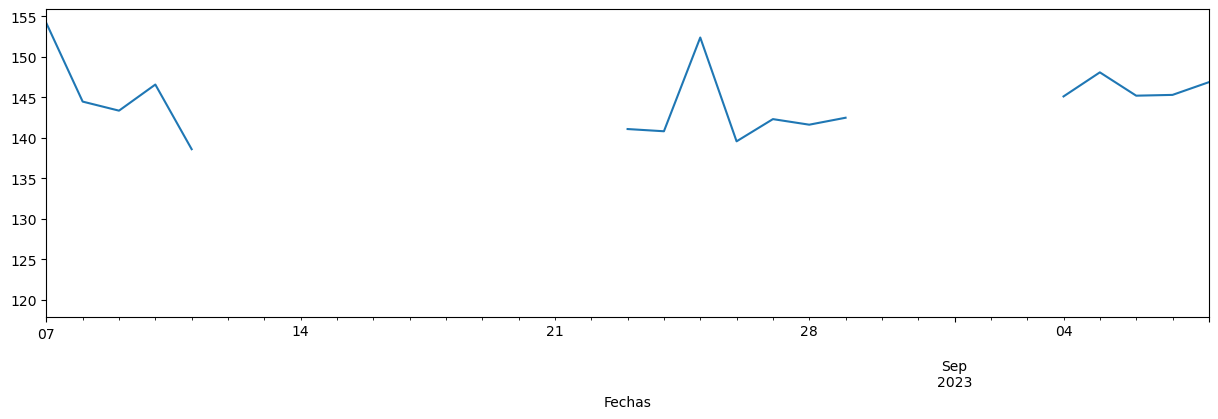

In [31]:
df=data_term.set_index('Fechas')
df[~df['prom_mean'].isnull()]['prom_mean'].resample("d").mean().plot(figsize=(15,4))

<Axes: xlabel='Fechas'>

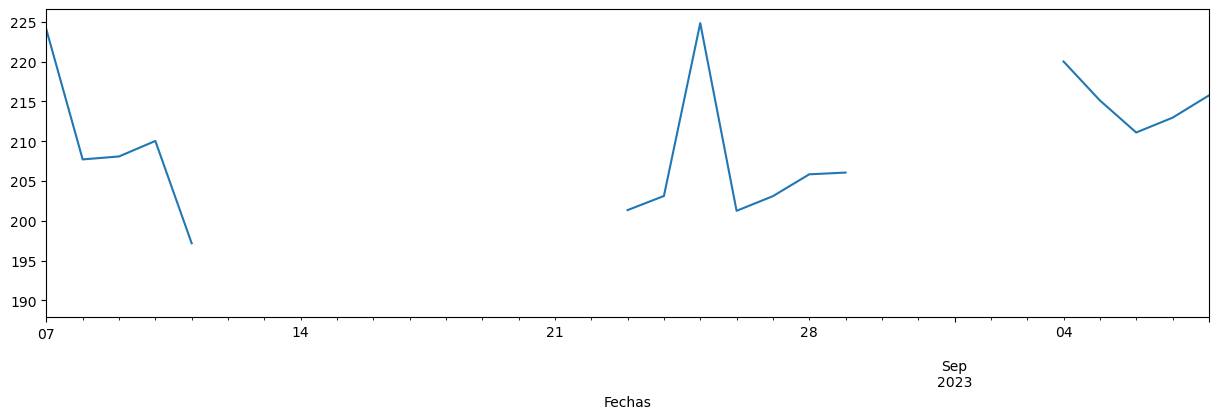

In [32]:
df[~df['lim_sup'].isnull()]['lim_sup'].resample("d").mean().plot(figsize=(15,4))

<Axes: xlabel='Fechas'>

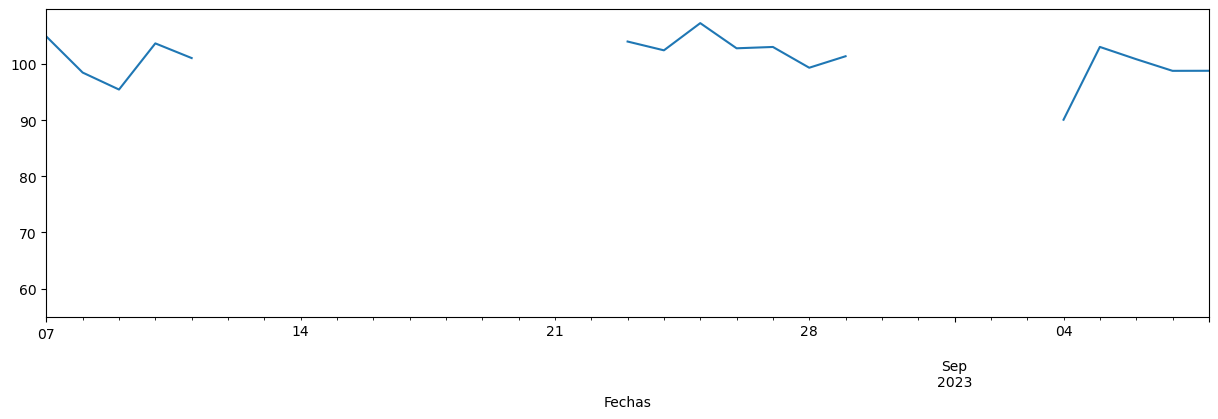

In [33]:
df[~df['lim_inf'].isnull()]['lim_inf'].resample("d").mean().plot(figsize=(15,4))

In [47]:
data_term.to_csv('data_termal1_todo.csv', index=False)

In [48]:
data_term.rename(columns={'Flujo Aire':'Flujo Aire [N m3/m]', 'Enriquecimiento O2':'Enriquecimiento O2 [%]',
                      'Alimentacion Concentrado':'Alimentación Concentrado [TPH]', 'Alimentación Si02':'Alimentacion Si02 [TPH]', 
                      'Alimentación Carga Fria':'Alimentacion Carga Fria [TPH]',
                     'Temperatura M.B.':'Temperatura M.B. [°C]', 'Temperatura Esc.':'Temperatura Esc. [°C]', 'Ley Concentrado S': 'Ley Concentrado S [%]',
                      'Ley Concentrado Cu':'Ley Concentrado Cu [%]',
                     'Ley Cu M.B.':'Ley Cu M.B. [%]', 'Ley Fe304 Esc.':'Ley Fe304 Esc. [%]', 'Temperatura Pirometro':'Temperatura Pirometro [°C]'
                      }).to_csv('formal_2_todo.csv', index=False)

## analisis y arbol de decisión

In [148]:
data_termal = pd.read_csv('data_termal1_todo.csv')

In [149]:
data_termal

,Fechas,Flujo Aire,Enriquecimiento O2,Alimentacion Concentrado,Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B.,Temperatura Esc.,TimeStamp_2,Ley Concentrado S,Ley Concentrado Cu,Ley Cu M.B.,Ley Fe304 Esc.,Coef_o2,Temperatura Pirometro,lim_inf,lim_sup,prom_mean
0,2021-07-01 00:05:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN
1,2021-07-01 00:10:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN
2,2021-07-01 00:15:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN
3,2021-07-01 00:20:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN
4,2021-07-01 00:25:00,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,2021-07-01,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221891,2023-09-26 23:35:00,428.311830,39.959777,47.850769,3.704009,0.002915,1253.044006,1219.471815,2023-09-26,33.400002,25.700001,73.110001,21.299999,245.747384,0.0,NaN,NaN,NaN
221892,2023-09-26 23:40:00,405.056208,41.069995,46.861435,3.689997,0.003185,1253.049756,1219.458582,2023-09-26,33.400002,25.700001,73.110001,21.299999,229.759118,0.0,NaN,NaN,NaN
221893,2023-09-26 23:45:00,408.806675,40.073460,47.916579,3.702188,0.003247,1253.041736,1219.465088,2023-09-26,33.400002,25.700001,73.110001,21.299999,220.804514,0.0,NaN,NaN,NaN
221894,2023-09-26 23:50:00,423.785469,40.633021,45.820613,3.700494,0.002907,1253.037366,1219.472473,2023-09-26,33.400002,25.700001,73.110001,21.299999,241.098607,0.0,NaN,NaN,NaN


In [150]:
data_termal[(data_termal['Alimentacion Concentrado']>28.1) & (data_termal['Alimentacion Concentrado']<89.3)]

,Fechas,Flujo Aire,Enriquecimiento O2,Alimentacion Concentrado,Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B.,Temperatura Esc.,TimeStamp_2,Ley Concentrado S,Ley Concentrado Cu,Ley Cu M.B.,Ley Fe304 Esc.,Coef_o2,Temperatura Pirometro,lim_inf,lim_sup,prom_mean
7377,2021-07-26 14:50:00,504.311401,35.242785,53.813225,0.002406,0.003394,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,197.910176,0.0,NaN,NaN,NaN
7378,2021-07-26 14:55:00,524.144736,38.554727,69.119440,0.002319,5.669296,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,217.242769,0.0,NaN,NaN,NaN
7379,2021-07-26 15:00:00,520.089897,38.450061,62.887104,0.002703,6.209809,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,206.049047,0.0,NaN,NaN,NaN
7380,2021-07-26 15:05:00,544.158908,37.720190,78.031567,0.002417,4.597235,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,185.518445,0.0,NaN,NaN,NaN
7381,2021-07-26 15:10:00,537.767420,37.941623,80.575603,0.002183,4.408920,0.000092,0.000092,2021-07-26,29.600000,24.200001,74.309998,38.099998,155.193008,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221891,2023-09-26 23:35:00,428.311830,39.959777,47.850769,3.704009,0.002915,1253.044006,1219.471815,2023-09-26,33.400002,25.700001,73.110001,21.299999,245.747384,0.0,NaN,NaN,NaN
221892,2023-09-26 23:40:00,405.056208,41.069995,46.861435,3.689997,0.003185,1253.049756,1219.458582,2023-09-26,33.400002,25.700001,73.110001,21.299999,229.759118,0.0,NaN,NaN,NaN
221893,2023-09-26 23:45:00,408.806675,40.073460,47.916579,3.702188,0.003247,1253.041736,1219.465088,2023-09-26,33.400002,25.700001,73.110001,21.299999,220.804514,0.0,NaN,NaN,NaN
221894,2023-09-26 23:50:00,423.785469,40.633021,45.820613,3.700494,0.002907,1253.037366,1219.472473,2023-09-26,33.400002,25.700001,73.110001,21.299999,241.098607,0.0,NaN,NaN,NaN


In [167]:
#data_term = pd.read_csv('data_termal1.csv')
#data_term = pd.read_csv('data_termal1_todo.csv')
data_term = pd.read_csv('formal_2_todo.csv')

In [169]:
data_term.columns

Index(['Fechas', 'Flujo Aire [N m3/m]', 'Enriquecimiento O2 [%]',
       'Alimentación Concentrado [TPH]', 'Alimentacion Si02 [TPH]',
       'Alimentacion Carga Fria [TPH]', 'Temperatura M.B. [°C]',
       'Temperatura Esc. [°C]', 'TimeStamp_2', 'Ley Concentrado S [%]',
       'Ley Concentrado Cu [%]', 'Ley Cu M.B. [%]', 'Ley Fe304 Esc. [%]',
       'Coef_o2', 'Temperatura Pirometro [°C]', 'Temperatura_min_prom [°C]',
       'Temperatura_max_prom [°C]', 'Temperatura_prom [°C]', 'Razon S/Cu'],
      dtype='object')

In [168]:
data_term

,Fechas,Flujo Aire [N m3/m],Enriquecimiento O2 [%],Alimentación Concentrado [TPH],Alimentacion Si02 [TPH],Alimentacion Carga Fria [TPH],Temperatura M.B. [°C],Temperatura Esc. [°C],TimeStamp_2,Ley Concentrado S [%],Ley Concentrado Cu [%],Ley Cu M.B. [%],Ley Fe304 Esc. [%],Coef_o2,Temperatura Pirometro [°C],Temperatura_min_prom [°C],Temperatura_max_prom [°C],Temperatura_prom [°C],Razon S/Cu
0,01-07-2021 0:05,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN,NaN
1,01-07-2021 0:10,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN,NaN
2,01-07-2021 0:15,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN,NaN
3,01-07-2021 0:20,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN,NaN
4,01-07-2021 0:25,0.000000,21.000000,0.000000,0.000000,0.000000,0.000092,0.000092,01-07-2021,0.000000,0.000000,74.309998,38.099998,50.000000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221891,26-09-2023 23:35,428.311830,39.959777,47.850769,3.704009,0.002915,1253.044006,1219.471815,26-09-2023,33.400002,25.700001,73.110001,21.299999,245.747384,0.0,NaN,NaN,NaN,1.299611
221892,26-09-2023 23:40,405.056208,41.069995,46.861435,3.689997,0.003185,1253.049756,1219.458582,26-09-2023,33.400002,25.700001,73.110001,21.299999,229.759118,0.0,NaN,NaN,NaN,1.299611
221893,26-09-2023 23:45,408.806675,40.073460,47.916579,3.702188,0.003247,1253.041736,1219.465088,26-09-2023,33.400002,25.700001,73.110001,21.299999,220.804514,0.0,NaN,NaN,NaN,1.299611
221894,26-09-2023 23:50,423.785469,40.633021,45.820613,3.700494,0.002907,1253.037366,1219.472473,26-09-2023,33.400002,25.700001,73.110001,21.299999,241.098607,0.0,NaN,NaN,NaN,1.299611


In [160]:
data_term['Razon S/Cu'] = data_term['Ley Concentrado S [%]']/data_term['Ley Concentrado Cu [%]']

In [163]:
data_term.rename(columns={'lim_inf':'Temperatura_min_prom [°C]','lim_sup':'Temperatura_max_prom [°C]','prom_mean':'Temperatura_prom [°C]',
                         'Alimentacion Si02':'Alimentacion Si02 [TPH]', 'Alimentacion Carga Fria':'Alimentacion Carga Fria [TPH]'}, inplace=True)

In [164]:
data_term.to_csv('formal_2_todo.csv', index=False)

Entradas:

-FI_325(Flujo de aire)

-FFIC_324.pv(Enriquecimiento de oxígeno)

-TASA_INST(Tasa de alimentación de concentrado seco)

-WIC_135.pv(Alimentación Sio2)

-WIC_134.pv(Alimentación carga fría)

-TIR_311(Temperatura Metal Blanco)

-TIR_315(Temperatura Escoria)

-Ley de concentrado de Cu

-Ley de concentrado de S

Salidas:

-Ley de cobre en Metal Blanco

-Ley de Fe304 en Escoria

In [134]:
#filtandro solo por aquellos valores que no son nulos
#df_filtrado1 = data_term.dropna(subset=['Alimentacion Concentrado','lim_sup'])
df_filtrado1 = data_term.dropna(subset=['Alimentación Concentrado [TPH]','lim_sup'])
df_filtrado1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3124 entries, 207348 to 216670
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fechas                          3124 non-null   object 
 1   Flujo Aire [N m3/m]             3124 non-null   float64
 2   Enriquecimiento O2 [%]          3124 non-null   float64
 3   Alimentación Concentrado [TPH]  3124 non-null   float64
 4   Alimentacion Si02               3124 non-null   float64
 5   Alimentacion Carga Fria         3124 non-null   float64
 6   Temperatura M.B. [°C]           3124 non-null   float64
 7   Temperatura Esc. [°C]           3124 non-null   float64
 8   TimeStamp_2                     3124 non-null   object 
 9   Ley Concentrado S [%]           3124 non-null   float64
 10  Ley Concentrado Cu [%]          3124 non-null   float64
 11  Ley Cu M.B. [%]                 3124 non-null   float64
 12  Ley Fe304 Esc. [%]         

In [135]:
df_filtrado1

,Fechas,Flujo Aire [N m3/m],Enriquecimiento O2 [%],Alimentación Concentrado [TPH],Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B. [°C],Temperatura Esc. [°C],TimeStamp_2,Ley Concentrado S [%],Ley Concentrado Cu [%],Ley Cu M.B. [%],Ley Fe304 Esc. [%],Coef_o2,Temperatura Pirometro [°C],lim_inf,lim_sup,prom_mean,Razon S/Cu
207348,2023-08-07 11:00:00,0.000000,21.000000,0.000000,0.002231,0.003349,0.000092,1259.992212,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,86.787187,227.664320,149.233908,1.353414
207349,2023-08-07 11:05:00,0.000000,21.000000,0.000000,0.002250,0.003331,0.000092,1260.004895,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,86.275580,227.729373,149.176764,1.353414
207350,2023-08-07 11:10:00,0.000000,21.000000,0.000000,0.002237,0.003406,0.000092,1260.010620,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,85.980800,227.045226,148.797023,1.353414
207351,2023-08-07 11:15:00,0.000000,21.000000,0.000000,0.002219,0.003321,0.000092,1260.013550,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,86.919407,226.278723,148.848016,1.353414
207352,2023-08-07 11:20:00,0.000000,21.000000,0.000000,0.002238,0.003381,0.000092,1260.020142,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,86.945045,225.888247,148.679628,1.353414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216666,2023-09-08 20:15:00,407.940082,39.015848,49.554652,2.984834,6.131053,1295.060730,1259.802808,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,97.400693,218.473542,147.124281,1.321285
216667,2023-09-08 20:20:00,405.455774,39.097100,46.932083,2.998756,5.888731,1295.058105,1259.810046,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,97.848000,219.538487,147.867628,1.321285
216668,2023-09-08 20:25:00,403.515690,39.097869,46.237407,2.987992,5.954612,1295.038586,1259.785828,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,95.359078,220.504352,147.380745,1.321285
216669,2023-09-08 20:30:00,405.707659,38.901518,46.963041,2.998783,5.972979,1295.047205,1259.783215,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,101.682833,222.739891,150.860469,1.321285


In [136]:
#df_filtrado1= df_filtrado1[df_filtrado1['Alimentacion Concentrado']>10]
df_filtrado1= df_filtrado1[df_filtrado1['Alimentación Concentrado [TPH]']>10]

In [137]:
df_filtrado1

,Fechas,Flujo Aire [N m3/m],Enriquecimiento O2 [%],Alimentación Concentrado [TPH],Alimentacion Si02,Alimentacion Carga Fria,Temperatura M.B. [°C],Temperatura Esc. [°C],TimeStamp_2,Ley Concentrado S [%],Ley Concentrado Cu [%],Ley Cu M.B. [%],Ley Fe304 Esc. [%],Coef_o2,Temperatura Pirometro [°C],lim_inf,lim_sup,prom_mean,Razon S/Cu
207394,2023-08-07 14:50:00,487.610968,35.979251,74.966753,0.002142,0.003669,0.000092,1260.164832,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,98.439174,220.099249,151.583772,1.353414
207395,2023-08-07 14:55:00,433.964387,38.513295,52.525330,0.001826,0.003586,0.000092,1260.172498,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,105.333749,211.121893,150.318730,1.353414
207396,2023-08-07 15:00:00,417.862209,37.785777,50.861572,0.002162,0.003512,436.215499,1260.168591,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,96.069666,218.999690,149.971223,1.353414
207397,2023-08-07 15:05:00,414.720843,37.278217,60.589799,3.437296,0.003621,1278.488403,1260.184485,2023-08-07,33.700001,24.9,73.519997,26.799999,0.0,0.0,121.073806,284.564580,187.082587,1.353414
207398,2023-08-07 15:10:00,411.891401,37.137262,50.232757,0.002258,0.003441,1278.504565,1260.182703,2023-08-07,33.700001,24.9,67.489998,26.799999,0.0,0.0,85.738833,183.372756,125.248386,1.353414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216666,2023-09-08 20:15:00,407.940082,39.015848,49.554652,2.984834,6.131053,1295.060730,1259.802808,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,97.400693,218.473542,147.124281,1.321285
216667,2023-09-08 20:20:00,405.455774,39.097100,46.932083,2.998756,5.888731,1295.058105,1259.810046,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,97.848000,219.538487,147.867628,1.321285
216668,2023-09-08 20:25:00,403.515690,39.097869,46.237407,2.987992,5.954612,1295.038586,1259.785828,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,95.359078,220.504352,147.380745,1.321285
216669,2023-09-08 20:30:00,405.707659,38.901518,46.963041,2.998783,5.972979,1295.047205,1259.783215,2023-09-08,32.900002,24.9,67.769997,19.900000,0.0,0.0,101.682833,222.739891,150.860469,1.321285


In [138]:
df_filtrado1.columns

Index(['Fechas', 'Flujo Aire [N m3/m]', 'Enriquecimiento O2 [%]',
       'Alimentación Concentrado [TPH]', 'Alimentacion Si02',
       'Alimentacion Carga Fria', 'Temperatura M.B. [°C]',
       'Temperatura Esc. [°C]', 'TimeStamp_2', 'Ley Concentrado S [%]',
       'Ley Concentrado Cu [%]', 'Ley Cu M.B. [%]', 'Ley Fe304 Esc. [%]',
       'Coef_o2', 'Temperatura Pirometro [°C]', 'lim_inf', 'lim_sup',
       'prom_mean', 'Razon S/Cu'],
      dtype='object')

In [144]:
###Encontrar correlacion de variables
#datos=df_filtrado1[['Flujo Aire', 'Enriquecimiento O2','Alimentacion Concentrado', 'Alimentacion Si02','Alimentacion Carga Fria',
#          'Temperatura M.B.', 'Temperatura Esc.', 'Ley Concentrado S','Ley Concentrado Cu','Coef_o2','lim_sup','lim_inf', 'prom_mean', 'Ley Cu M.B.','Ley Fe304 Esc.']]
#df_filtrado1.rename(columns={'Alimentacion Si02':'Alimentacion Si02 [TPH]', 'Alimentacion Carga Fria':'Alimentacion Carga Fria [TPH]'}, inplace=True)
#df_filtrado1.rename(columns={'lim_sup':'Temperatura_max_prom','lim_inf':'Temperatura_min_prom', 'prom_mean':'Temperatura_prom'}, inplace=True)
datos=df_filtrado1[['Flujo Aire [N m3/m]', 'Enriquecimiento O2 [%]','Alimentación Concentrado [TPH]', 'Alimentacion Si02 [TPH]','Alimentacion Carga Fria [TPH]',
          'Temperatura M.B. [°C]', 'Temperatura Esc. [°C]', 'Ley Concentrado S [%]','Ley Concentrado Cu [%]', 'Razon S/Cu','Temperatura_max_prom','Temperatura_min_prom', 'Temperatura_prom', 'Ley Cu M.B. [%]','Ley Fe304 Esc. [%]']]

In [145]:
corr=datos.corr(method='pearson')

In [146]:
corr

,Flujo Aire [N m3/m],Enriquecimiento O2 [%],Alimentación Concentrado [TPH],Alimentacion Si02 [TPH],Alimentacion Carga Fria [TPH],Temperatura M.B. [°C],Temperatura Esc. [°C],Ley Concentrado S [%],Ley Concentrado Cu [%],Razon S/Cu,Temperatura_max_prom,Temperatura_min_prom,Temperatura_prom,Ley Cu M.B. [%],Ley Fe304 Esc. [%]
Flujo Aire [N m3/m],1.000000,0.283003,0.067149,0.285991,0.115842,0.106701,-0.057035,-0.297354,0.042767,-0.292937,0.107589,0.065278,0.112888,-0.087075,-0.013120
Enriquecimiento O2 [%],0.283003,1.000000,-0.227250,0.298592,0.143839,0.096410,0.046668,-0.274161,0.078547,-0.296541,-0.049154,-0.004815,-0.078395,-0.107591,-0.212112
Alimentación Concentrado [TPH],0.067149,-0.227250,1.000000,-0.055284,-0.042332,-0.002099,-0.044955,-0.033021,-0.024426,-0.007327,-0.004240,-0.012711,-0.009956,0.061233,-0.015894
Alimentacion Si02 [TPH],0.285991,0.298592,-0.055284,1.000000,0.101243,0.252770,0.010250,-0.567567,-0.151485,-0.370532,0.281420,0.015411,0.216060,-0.205860,-0.006168
Alimentacion Carga Fria [TPH],0.115842,0.143839,-0.042332,0.101243,1.000000,0.143127,-0.172791,0.021895,0.136212,-0.089335,-0.014881,0.246671,0.052992,0.097508,0.145338
Temperatura M.B. [°C],0.106701,0.096410,-0.002099,0.252770,0.143127,1.000000,-0.040327,-0.127584,-0.068803,-0.055781,0.128439,0.162427,0.156313,-0.064073,0.091498
Temperatura Esc. [°C],-0.057035,0.046668,-0.044955,0.010250,-0.172791,-0.040327,1.000000,-0.070270,0.039502,-0.093984,-0.003597,-0.042154,-0.007623,0.109650,-0.089215
Ley Concentrado S [%],-0.297354,-0.274161,-0.033021,-0.567567,0.021895,-0.127584,-0.070270,1.000000,0.281301,0.633787,-0.139853,0.127929,-0.055922,0.062164,0.195968
Ley Concentrado Cu [%],0.042767,0.078547,-0.024426,-0.151485,0.136212,-0.068803,0.039502,0.281301,1.000000,-0.563805,-0.012638,0.009297,-0.027050,-0.016803,-0.108288
Razon S/Cu,-0.292937,-0.296541,-0.007327,-0.370532,-0.089335,-0.055781,-0.093984,0.633787,-0.563805,1.000000,-0.110247,0.100374,-0.028176,0.068610,0.254206


<Axes: >

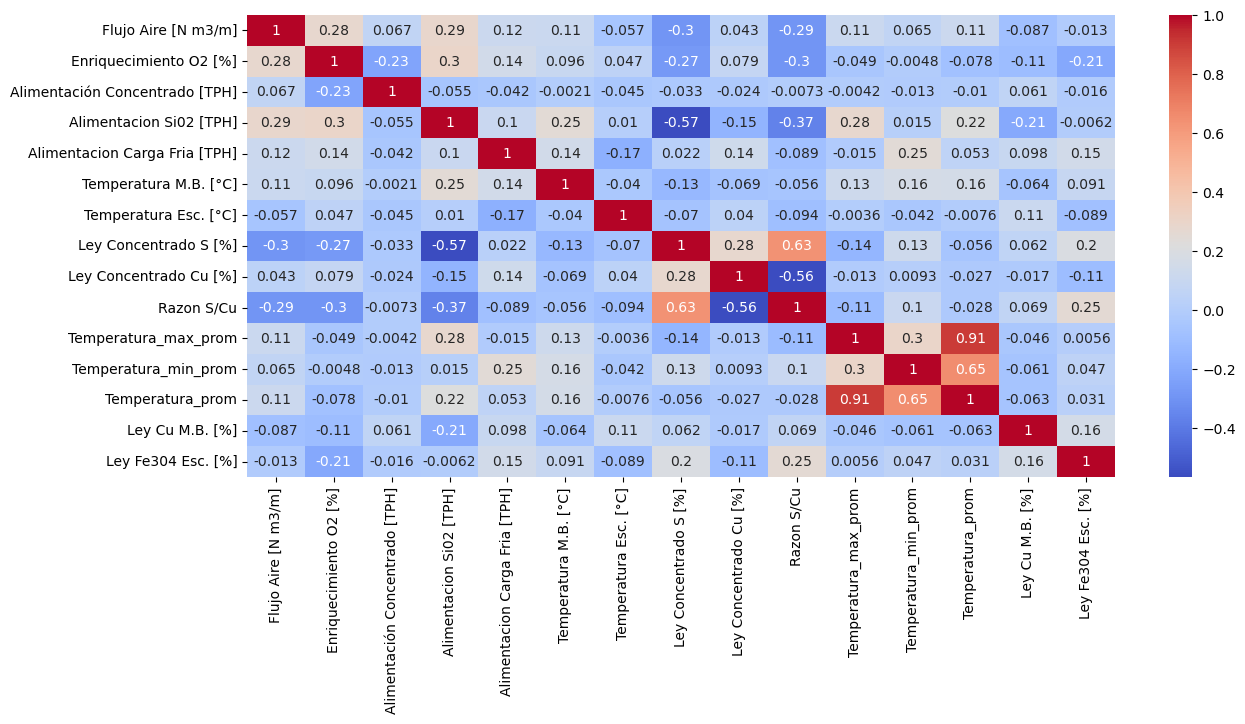

In [147]:
plt.figure(figsize=(14,6))
sns.heatmap(datos.corr(),cmap='coolwarm',annot=True)

In [19]:
#df = df[df['TASA_alimentacion_conc']>10]
data_term.columns

Index(['Fechas', 'Flujo Aire', 'Enriquecimiento O2',
       'Alimentacion Concentrado', 'Alimentacion Si02',
       'Alimentacion Carga Fria', 'Temperatura M.B.', 'Temperatura Esc.',
       'TimeStamp_2', 'Ley Concentrado S', 'Ley Concentrado Cu', 'Ley Cu M.B.',
       'Ley Fe304 Esc.', 'Coef_o2', 'Temperatura Pirometro', 'lim_inf',
       'lim_sup', 'prom_mean'],
      dtype='object')

In [90]:
df_filtro = datos#df_sin_outliers#df[(df['MB_Cu']>65) & (df['MB_Cu']<80)]

In [91]:
df_filtro.shape

(1672, 15)

In [100]:
y = df_filtro.dropna()[['Ley Cu M.B.','Ley Fe304 Esc.']]
#X = df_filtro.dropna()[['Flujo aire', 'Coef_O2', 'TASA_alimentacion_conc', 'alimentacion Si02', 'alimentacion carga fria']]
X = df_filtro.dropna().drop(['Ley Cu M.B.','Ley Fe304 Esc.', 'lim_inf', 'lim_sup'], axis=1)

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 42, max_depth=6)
#regressor = DecisionTreeRegressor()
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [103]:
y_pred = regressor.predict(X_test)

In [104]:
y_pred

array([[74.64085181, 18.56821716],
       [74.64085181, 18.56821716],
       [71.3388443 , 16.38846155],
       ...,
       [71.52978954, 19.54255348],
       [67.55607835, 18.84659082],
       [70.95727288, 19.64405581]])

In [105]:
# Calcula la exactitud del modelo en los datos de prueba
#accuracy = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))

In [106]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='con_termal.dot',
               feature_names =X.columns)
#from io import StringIO
#import pydotplus
#
#dot_data = StringIO()
#export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('arbol_decision.png')

In [153]:
#graph.write_png('arbol_decision.png')